# Calculo del número $\pi$ usando la seríe de Leibniz con openMP

<center> Juan Andrés Bueno Ramírez</br>Jhon Sebastián Moreno Triana<center>

Usando la librería de ```c```, openMP, se usaron distinto número de hilos para aproximar el número $\pi$ usando ```2e9``` iteraciones. Midiendo el tiempo de uso de la CPU respecto del número de hilos es posible obtener el speedUp del programa paralelizado.

In [2]:
import numpy as np
import matplotlib.pylab as mp

In [3]:
!nvcc --version

/bin/bash: nvcc: command not found


## Paralelismo sin "False Sharing"
Para la primera parte del uso de la serie es usó el siguiente código:

Obteniendo así los siguientes datos y gráficos:

In [4]:
num = np.linspace(1,16,16)
times = [[30.717688, 30.529005, 31.208959] #1
         ,[70.363876, 59.649853, 63.657153]  #2
         ,[10.272671,10.182516,10.258627]  #3
         ,[7.665813,8.449137,7.894132]     #4
         ,[6.379021,6.308562,6.387339]     #5
         ,[5.149860,5.057618,5.008782]     #6
         ,[4.368433,4.420176,4.446999]     #7
         ,[3.922784,3.959320,3.866879]     #8
         ,[3.360359,3.402845,3.457657]     #9
         ,[3.027021,3.128305,3.089826]     #10
         ,[2.729792,2.771821,2.913783]     #11
         ,[2.620160,2.568784,2.487094]     #12
         ,[2.331105,2.376645,2.346943]     #13
         ,[2.184369,2.121364,2.218135]     #14
         ,[2.111175,2.052031,2.072499]     #15
         ,[1.888218,1.854899,1.950670]]    #16
time = np.array([ sum(t)/len(t) for t in times])
num[1:16:2]

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16.])

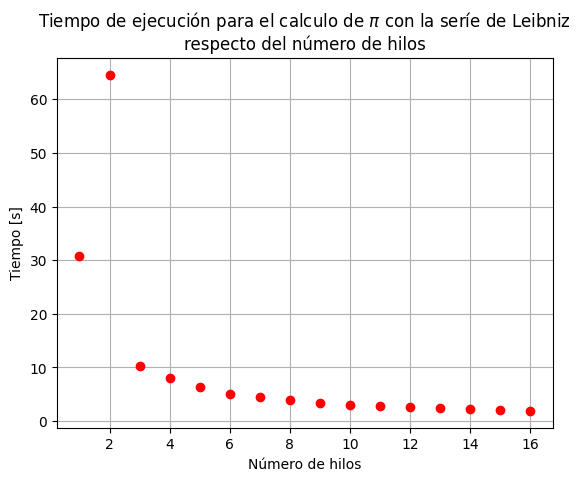

In [5]:
#time = [65.06, 99.65, 66.94,48.66,32.42,19.51,16.22,14.63]
mp.plot(num,time, "ro")
#mp.plot(num[1:-1:2],time[1:-1:2], "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

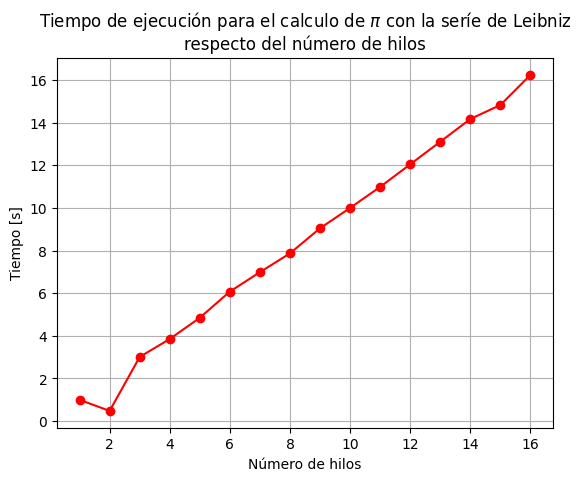

In [6]:
mp.plot(num,time[0]/time, "r-")
mp.plot(num,time[0]/time, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

## Paralelismo con False Sharing

Para el caso de paralelismo con False Sharing se usó el siguiente código:

Obteniendo los siguientes resultados:

In [7]:
numFS = np.linspace(1,16,16)
timesFS = [[31.728843, 31.252906, 31.329296] #1
         ,[15.241374,15.228445,15.157039]  #2
         ,[10.272671,10.182516,10.258627]  #3
         ,[7.665813,8.449137,7.894132]     #4
         ,[6.379021,6.308562,6.387339]     #5
         ,[5.149860,5.057618,5.008782]     #6
         ,[4.368433,4.420176,4.446999]     #7
         ,[3.922784,3.959320,3.866879]     #8
         ,[3.360359,3.402845,3.457657]     #9
         ,[3.027021,3.128305,3.089826]     #10
         ,[2.729792,2.771821,2.913783]     #11
         ,[2.620160,2.568784,2.487094]     #12
         ,[2.331105,2.376645,2.346943]     #13
         ,[2.184369,2.121364,2.218135]     #14
         ,[2.111175,2.052031,2.072499]     #15
         ,[1.888218,1.854899,1.950670]]    #16

timeFS = np.array([ sum(t)/len(t) for t in timesFS])

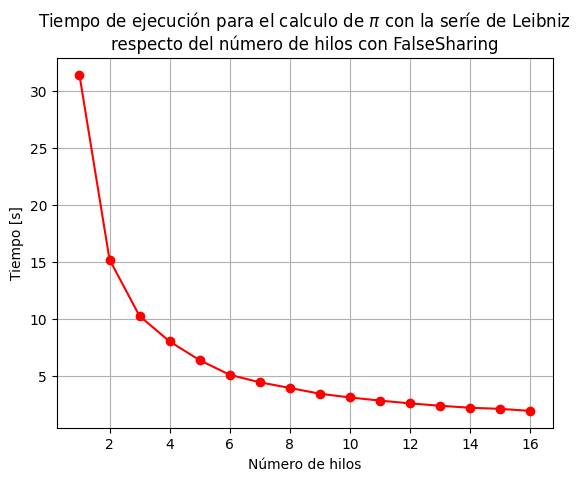

In [8]:
mp.plot(numFS,timeFS, "r-")
mp.plot(numFS,timeFS, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos con FalseSharing")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

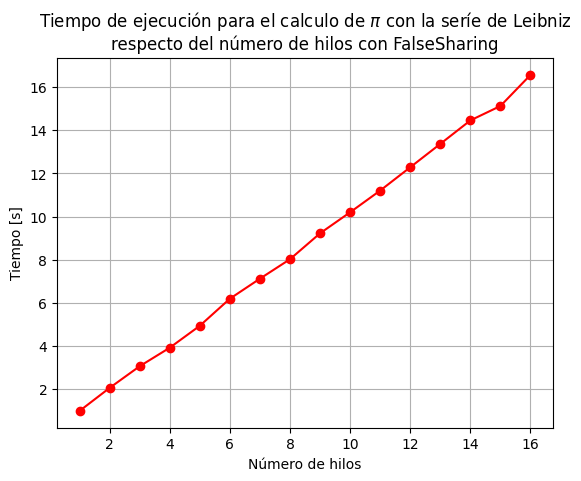

In [9]:
mp.plot(numFS,timeFS[0]/timeFS, "r-")
mp.plot(numFS,timeFS[0]/timeFS, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos con FalseSharing")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

## Comparación FS y no FS

Usando la expresión $\dfrac{T_{nFS}}{T_{FS}}$ se puede notar el comportamiento del rendimiento usando las dos técnicas.

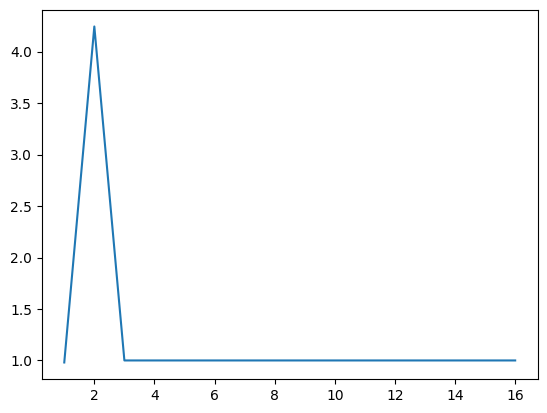

In [10]:
mp.plot(num, time/timeFS)

Donde todos los valores son mayores a 1.